# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods

### By: Jeeten Patel

Introduction/Business Problem:

Target Country: 
India (Hindi: Bhārat), officially the Republic of India, is a country in South Asia. It is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast.

Aim:
This project elaborated on a Machine Learning concepts that attempt to analyze the segmentation of world-class standard services hotel & restaurants located across India and tries to understand what is popular around them and what they have to offer to someone who is contemplating to choose stay. The data is taken from https://data.gov.in. These Hotel types are specifically classified in categories: Heritage Grand, Heritage Classic, Heritage Basic, 5 Star Deluxe, 5 Star and 4 Star. 

The deciding factor would be on how lively, supportive, vibrant and unique each of the locations around the hotel would be when compared to each other and also considering that particular Hotel service & features. The business problem in this study assumes that it will assist people who are interested in creating a projection of potential life and activities in these hotel neighborhoods or if anyone interested in a potential location for a business opportunity. 

We’ll identify places that are fit for various individuals based on the data collected from the Foursquare and information retrieved from the Data Science application.


Data Section:

Data source- https://data.gov.in/resources/approved-hotelsrestaurantsair-catering-unitstime-share-resortsapartmentsconvention (csv format)

The above data has been published by the Ministry of Tourism for Classifying/ Re-classifying Hotels under various categories at the project level. The aims and objectives of this scheme are to provide world-class standard services to tourists. 

For this project, analysis is carried using pandas Dataframe and cleaning up the irrelevant data columns for this analyze which are 'PHONE', 'FAX', 'EMAIL ID' and 'WEBSITE'. We will use the Nominatim library from geocoders.geopy package to find the longitude and latitude for each these locations. A new data column 'Loc' has been created combining 'HOTEL NAME' & 'STATE' for restricting only to India. For Data Visualization Seaborn and Matlabplot libraries have been used. Visualize these hotel locations on a folium map.

The Foursquare API to find the top venues in the neighbourhoods of these Hotels. This will help understand to the nature of life around these locations. For illustration purposes analyse the popular venues located within 500m radius is considered .

### Import Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import seaborn as sns # plotting library
import matplotlib.pyplot as plt # plotting library
import folium # plotting library
%matplotlib inline 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')


# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes

!conda install -c conda-forge googlemaps
print('Folium installed')
print('Libraries imported.')

Libraries imported.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Jeeten\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/main --> conda-forge




conda-4.8.2          | 3.0 MB    |            |   0% 
conda-4.8.2          | 3.0 MB    | 3          |   3% 
conda-4.8.2          | 3.0 MB    | ###1       |  31% 
conda-4.8.2          | 3.0 MB    | ######1    |  61% 
conda-4.8.2          | 3.0 MB    | #########1 |  92% 
conda-4.8.2          | 3.0 MB    | ########## 

## 1.Download and Explore Dataset

#### Load and explore the data from Data Source :https://data.gov.in (List of All Classified/Re-classified Hotels as on date)

In [2]:
hotel_data=pd.read_csv('C:/Users/Jeeten/Downloads/HotelTourismData.csv')

In [3]:
h=hotel_data
h.columns

Index(['Hotel Name', 'Address', 'State', 'Phone', 'Fax', 'Email ID', 'Website',
       'Type', 'Rooms'],
      dtype='object')

In [4]:
#Dropping irrelavant columns
h.drop(['Phone','Fax','Email ID','Website'],axis=1,inplace=True)

In [5]:
#Combining HOTEL NAME & ADDRESS
h['Dummy']=h['Hotel Name'].astype(str) +" "+h['State']
h.head()

,Hotel Name,Address,State,Type,Rooms,Dummy
0,The Oberoi Cecil,"""Ambedkar ChowkChaura Maidan, Shimla - 171004,...",HIMACHAL PRADESH,Heritage Grand,75,The Oberoi Cecil HIMACHAL PRADESH
1,The Lalit Grand Palace,"""Gupkar Road, Srinagar, JAMMU AND KASHMIR""",JAMMU AND KASHMIR,Heritage Grand,112,The Lalit Grand Palace JAMMU AND KASHMIR
2,Hotel Fateh Prakash Palace,"""The City Palace Complex, Udaipur - 313001, RA...",RAJASTHAN,Heritage Grand,30,Hotel Fateh Prakash Palace RAJASTHAN
3,Shiv Niwas Palace,"""The City Palace ComplexUdaipur, Udaipur, RAJA...",RAJASTHAN,Heritage Grand,36,Shiv Niwas Palace RAJASTHAN
4,Savoy Hotel,"""77, Sylks Road, Ootacamund, TAMIL NADU""",TAMIL NADU,Heritage Grand,40,Savoy Hotel TAMIL NADU


## 2. Finding longitude & latitude using  geopy.geocoder

In [6]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")
my_address = 'India'
h['location'] = h['DUMMY'].apply(geolocator.geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
h['point'] = h['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
h[['latitude', 'longitude']] = pd.DataFrame(h['point'].tolist(), index=h.index)

NameError: name 'Nominatim' is not defined

In [ ]:
#export_csv=h.to_csv(r'C:\Users\Jeeten\#Sekiro\Hotel_data_with_lat_lag.csv')

In [ ]:
hm=pd.read_csv('C:/Users/Jeeten/#Sekiro/Hotel_data_with_lat_lag.csv')
hm.drop(['Dummy'],axis=1,inplace=True)
hm['Dummy-1']=hm['Hotel Name'].astype(str) +"- "+hm['Type']

In [ ]:
hm.head()

In [ ]:
hm.info()

In [ ]:
hm.shape

## 3. Data Visualization

### Hotel Distribution

In [ ]:
hm['Type'].unique()
#### Hotel Classification:- Heritage Grand, Heritage Classic, Heritage Basic, 5 Star Deluxe, 5 Star and 4 Star.

#### Pie-Chart Analysis

In [ ]:
sizes = hm['Type'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','white']
explode = (0, 0, 0, 0,0,0)  # explode 1st slice
labels = hm['Type'].value_counts().index

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

#### Bar-Chart Analysis

In [ ]:
sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
sns.catplot(x='Type',data=hm, kind="count",legend=True,height=5,aspect=1.5)

#### Count Plot State-wise Analysis

In [ ]:
sns.catplot(y="State", hue="Type", kind="count",
            palette="pastel", edgecolor=".6",
            data=hm,aspect=1,height=15);

####  Folium Map Analysis 

In [303]:
from folium import IFrame
map_india = folium.Map(location=[28.7041, 77.1025], zoom_start=5)

def marker(p,q):
    dummy=hm[hm['Type']==p][['Latitude','Longitude','Dummy-1']].reset_index()
    for i,j,z in zip(dummy['Latitude'],dummy['Longitude'],dummy['Dummy-1']):
        folium.Marker(location=[i, j],popup=z,icon=folium.Icon(color=q,icon='info-sign')).add_to(map_india)

legend_html =   '''
                <div style="position: fixed; 
                            bottom: 30px; left: 50px; width: 130px; height: 150px; 
                            border:2px solid grey; z-index:9999; font-size:12px;
                            ">&nbsp; Heritage Grand   &nbsp; <i class="fa fa-map-marker fa-2x" style="color:purple"></i><br>
                              &nbsp; Heritage Classic &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
                              &nbsp; Heritage Basic   &nbsp; <i class="fa fa-map-marker fa-2x" style="color:black"></i><br>
                              &nbsp; 5 Star           &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
                              &nbsp; 4 Star           &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i>
                </div>
                ''' 

marker('Heritage Grand','purple')
marker('Heritage Classic','red')
marker('Heritage Basic','black')
marker('5 Star','green')
marker('4 Star','blue')

map_india.get_root().html.add_child(folium.Element(legend_html))
map_india

### Relationship between Rooms and Hotel Type

#### Mean

In [111]:
hm.groupby(['Type'])['Rooms'].mean()

Type
4 Star               74.347826
5 Star              114.985915
5 Star Deluxe       194.785714
Heritage Basic       26.596154
Heritage Classic     33.500000
Heritage Grand       58.600000
Name: Rooms, dtype: float64

#### Boxplots Analysis

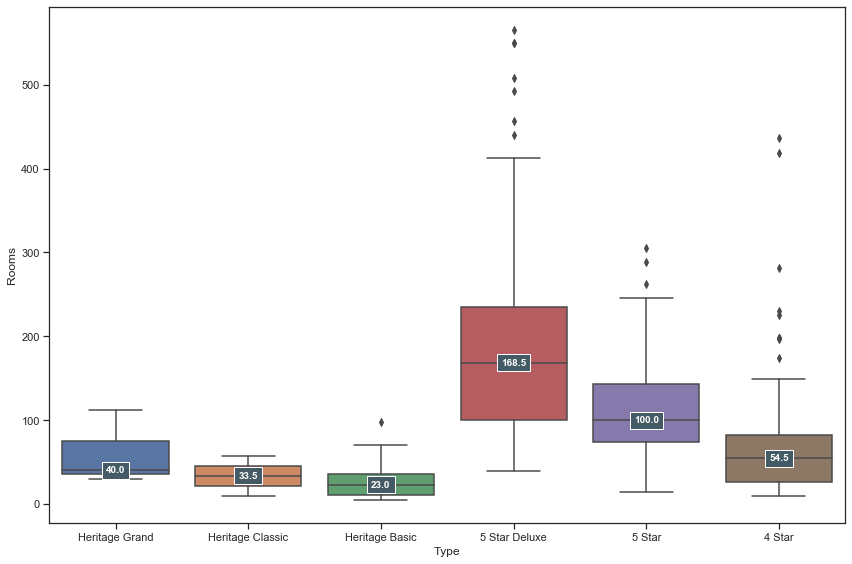

In [26]:
plt.figure(figsize=(12,8))
box_plot=sns.boxplot(y='Rooms',x='Type',data=hm)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

#### Categorical scatterplots Analysis

<Figure size 864x576 with 0 Axes>

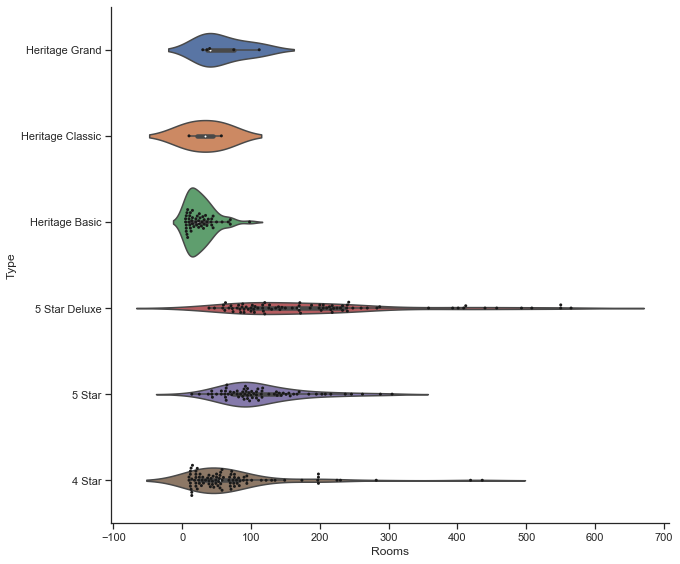

In [27]:
plt.figure(figsize=(12,8))
g=sns.catplot(x='Rooms',y='Type', kind="violin",height=8, aspect=1.2,data=hm);
sns.swarmplot(x='Rooms',y='Type', color="k", size=3, data=hm, ax=g.ax);

## Foursquare API

#### Foursquare ID & Secret code 

In [28]:
import json, requests

client_id='F2BAOEXUKOPNOTFKSTMJYNAQAZLRRGFENCIOGVPMRHB4D2NY' # your Foursquare ID
client_secret='0HAXLZNIDIQHOBUZQ4DWI5EX03AMWAPWXW5QHUFRLPQUYTUS' # your Foursquare Secret
v=20140715# Foursquare API version
LIMIT=30
radius=1000

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            v, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Hotel Name', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
hotels_venues = getNearbyVenues(names=hm['Hotel Name'],latitudes=hm['Latitude'],longitudes=hm['Longitude'])

The Oberoi Cecil
The Lalit Grand Palace
Hotel Fateh Prakash Palace
Shiv Niwas Palace
Savoy Hotel 
Raheem Residency
Noor Us Sabah Palace
The Panjim Inn 
Balaram Palace Resort
Nilambag Palace Hotel
The Fort Ramgarh
The Judges Court
The Palace
The Castle Naggar
Hotel Cherthala House
Heritaga Methanam
Old Lighthouse Bristow Hotel 
Hotel Le Colonial 
Kunnathur Mana Ayurveda Heritage
Old Harbour Hotel
Coconut Lagoon
Beach Hotel
Palakkad Heritage Hotels
Somatheeram Ayurvedic Beach Resort (P) Ltd.
The Hillway Heritage
Ahilya Fort 
Hotel Rock End Manor 
Satpura Retreat
Hotel Sheesh Mahal 
Jehan Numa Palace Hotel 
LE DUPLEIX 
Calve
Welcome Heritage, Khimsar Fort
The Bagh 
Gajner Palace
The Laxmi Niwas Palace 
Chomu Palace
Bissau Palace 
Deogarh Resorts
Shikarbadi Hotel
Welcom Heritage - Koolwal Kothi
Ajit Bhawan
Hotel Samode Palace
Raj Niwas Palace
Hotel Castle Mandawa Pvt.Ltd.
Rohet Garh
Lake Pichola Hotel
The Ramgarh Lodge
Hotel Indra Villas 
Singhasan Haveli
Fort Khejarla
Sardargarh Heritage 

In [114]:
print(hotels_venues.shape)
hotels_venues.head()

(5106, 7)


,Hotel Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Oberoi Cecil,31.10316,77.15499,The Oberoi Cecil,31.103185,77.154854,Hotel
1,The Oberoi Cecil,31.10316,77.15499,Viceregal Lodge,31.102536,77.150416,Historic Site
2,The Oberoi Cecil,31.10316,77.15499,Shimla Railway Station,31.102686,77.159933,Train Station
3,The Oberoi Cecil,31.10316,77.15499,Hotel CK International,31.097800,77.151418,Hotel
4,The Oberoi Cecil,31.10316,77.15499,Shimla Inter-State Bus Terminal,31.098040,77.150906,Bus Station


In [115]:
hotels_venues.groupby('Hotel Name').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Hotel Name,,,,,,
ATS Residency,8,8,8,8,8,8
Ahilya Fort,4,4,4,4,4,4
Ajit Bhawan,15,15,15,15,15,15
"Aman, New Delhi",30,30,30,30,30,30
Beach Hotel,5,5,5,5,5,5
Bell Tower Resorts Pvt.Ltd.,4,4,4,4,4,4
Best Western Amrutha Castle,30,30,30,30,30,30
Bissau Palace,9,9,9,9,9,9
Bogmallo Beach Resort,7,7,7,7,7,7


In [116]:
print('There are {} uniques categories.'.format(len(hotels_venues['Venue Category'].unique())))

There are 271 uniques categories.


In [117]:
# one hot encoding
hotels_venues_onehot = pd.get_dummies(hotels_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hotels_venues_onehot['Hotel Name'] = hotels_venues['Hotel Name'] 

# move neighborhood column to the first column
fixed_columns = [hotels_venues_onehot.columns[-1]] + list(hotels_venues_onehot.columns[:-1])
hotels_venues_onehot = hotels_venues_onehot[fixed_columns]

hotels_venues_onehot.head()

,Hotel Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Balinese Restaurant,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Business Center,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Capitol Building,Caribbean Restaurant,Casino,Castle,Chaat Place,Cheese Shop,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Church,City,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Currency Exchange,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Internet Cafe,Irani Cafe,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Nightlife Spot,Noodle House,North Indian Restaurant,Northeast Indian Restaurant,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Palace,Park,Parsi Restaurant,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,River,Road,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Temple,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Tourist Information Center,Track,Trail,Train Station,Travel Agency,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Oberoi Cecil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [118]:
hotels_venues.shape

(5106, 7)

In [88]:
# one hot encoding
hotels_venues_onehot = pd.get_dummies(hotels_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hotels_venues_onehot['Hotel Name'] = hotels_venues['Hotel Name'] 

# move neighborhood column to the first column
fixed_columns = [hotels_venues_onehot.columns[-1]] + list(hotels_venues_onehot.columns[:-1])
hotels_venues_onehot = hotels_venues_onehot[fixed_columns]

hotels_venues_onehot.head()

,Hotel Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Andhra Restaurant,Arcade,...,Travel Agency,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Oberoi Cecil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Oberoi Cecil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Oberoi Cecil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Oberoi Cecil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Oberoi Cecil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
hotels_venues_onehot.shape

(5106, 272)

In [122]:
hotels_venues_grouped = hotels_venues_onehot.groupby('Hotel Name').mean().reset_index()
hotels_venues_grouped.head()

,Hotel Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Balinese Restaurant,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Business Center,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Capitol Building,Caribbean Restaurant,Casino,Castle,Chaat Place,Cheese Shop,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Church,City,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Currency Exchange,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Internet Cafe,Irani Cafe,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Nightlife Spot,Noodle House,North Indian Restaurant,Northeast Indian Restaurant,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Palace,Park,Parsi Restaurant,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,River,Road,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Temple,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Tourist Information Center,Track,Trail,Train Station,Travel Agency,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,ATS Residency,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [123]:
hotels_venues_grouped.shape

(299, 272)

#### Let's print each neighborhood along with the top 20 most common venues

In [ ]:
num_top_venues = 20

for hood in hotels_venues_grouped['Hotel Name']:
    print("----"+hood+"----")
    temp = hotels_venues_grouped[hotels_venues_grouped['Hotel Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [192]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [291]:
num_top_venues = 21

indicators = ['','st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Hotel Name']

for ind in np.arange(num_top_venues):
    if ind==0:
        columns.append('Type')
    else:
        try:
            columns.append('{}{} Most Famous Venue'.format(ind, indicators[ind]))
        except:
            columns.append('{}th Most Famous Venue'.format(ind))

# create a new dataframe
hotels_venues_sorted = pd.DataFrame(columns=columns)
hotels_venues_sorted['Hotel Name'] = hotels_venues_grouped['Hotel Name']

for ind in np.arange(hotels_venues_grouped.shape[0]):
    hotels_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hotels_venues_grouped.iloc[ind, :], num_top_venues)

hotels_venues_sorted

,Hotel Name,Type,1st Most Famous Venue,2nd Most Famous Venue,3rd Most Famous Venue,4th Most Famous Venue,5th Most Famous Venue,6th Most Famous Venue,7th Most Famous Venue,8th Most Famous Venue,9th Most Famous Venue,10th Most Famous Venue,11th Most Famous Venue,12th Most Famous Venue,13th Most Famous Venue,14th Most Famous Venue,15th Most Famous Venue,16th Most Famous Venue,17th Most Famous Venue,18th Most Famous Venue,19th Most Famous Venue,20th Most Famous Venue
0,ATS Residency,Hotel,Track,Indian Restaurant,Other Great Outdoors,Bus Station,Shopping Mall,Bakery,Farm,Farmers Market,Fast Food Restaurant,Field,Yoga Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Falafel Restaurant,Eastern European Restaurant
1,Ahilya Fort,Resort,Indian Restaurant,Historic Site,River,Yoga Studio,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Eastern European Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Electronics Store,Donut Shop,Duty-free Shop
2,Ajit Bhawan,Hotel,Indian Restaurant,Café,Bakery,Pizza Place,American Restaurant,Multiplex,Shopping Mall,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Yoga Studio,Fish Market,Falafel Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Flea Market
3,"Aman, New Delhi",Indian Restaurant,Hotel,Café,Lounge,Tibetan Restaurant,Food & Drink Shop,Food,Fast Food Restaurant,Bar,Bakery,Restaurant,Korean Restaurant,Snack Place,Indian Chinese Restaurant,Ice Cream Shop,Deli / Bodega,Dim Sum Restaurant,Falafel Restaurant,Flower Shop,Flea Market,Fish Market
4,Beach Hotel,Resort,Hotel,Spa,Beach,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Yoga Studio,Event Space,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Falafel Restaurant,Eastern European Restaurant,Electronics Store,French Restaurant
5,Bell Tower Resorts Pvt.Ltd.,Balinese Restaurant,Indian Restaurant,Pizza Place,Clothing Store,Yoga Studio,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Flea Market,Event Space,Food,Food & Drink Shop,Food Court,Food Truck,Falafel Restaurant,Eastern European Restaurant,Electronics Store
6,Best Western Amrutha Castle,Multiplex,Indian Restaurant,Chinese Restaurant,Hotel,Ice Cream Shop,Coffee Shop,Restaurant,South Indian Restaurant,Lounge,Fast Food Restaurant,Stadium,Garden,Middle Eastern Restaurant,Science Museum,Performing Arts Venue,Park,Hyderabadi Restaurant,Vegetarian / Vegan Restaurant,Lake,Flea Market,Farm
7,Bissau Palace,Hotel,Coffee Shop,Indian Restaurant,Sculpture Garden,Food,Historic Site,Yoga Studio,Field,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Electronics Store,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Event Space,Duty-free Shop
8,Bogmallo Beach Resort,Pub,Indian Restaurant,Beach,Seafood Restaurant,Restaurant,Resort,Yoga Studio,Farmers Market,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Eastern European Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Electronics Store,Dumpling Restaurant
9,Calve,Hotel,Indian Restaurant,Restaurant,Pizza Place,Café,Bakery,French Restaurant,Beach,Fast Food Restaurant,BBQ Joint,Dessert Shop,Coffee Shop,Spa,Hotel Bar,Italian Restaurant,Vegetarian / Vegan Restaurant,Video Store,Park,Shop & Service,Afghan Restaurant,Ice Cream Shop


In [292]:
#Copy created
export_csv=neighborhoods_venues_sorted.to_csv(r'C:\Users\Jeeten\#Sekiro\neighborhoods_venues_sorted.csv')

In [293]:
fs=pd.read_csv('C:/Users/Jeeten/#Sekiro/neighborhoods_venues_sorted.csv')
fs.drop(['Unnamed: 0','Hotel Name','Type'],axis=1,inplace=True)
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
1st Most Famous Venue     299 non-null object
2nd Most Famous Venue     299 non-null object
3rd Most Famous Venue     299 non-null object
4th Most Famous Venue     299 non-null object
5th Most Famous Venue     299 non-null object
6th Most Famous Venue     299 non-null object
7th Most Famous Venue     299 non-null object
8th Most Famous Venue     299 non-null object
9th Most Famous Venue     299 non-null object
10th Most Famous Venue    299 non-null object
dtypes: object(10)
memory usage: 23.5+ KB


### Run k-means to cluster the neighborhood into 3 clusters.

In [294]:
# set number of clusters
kclusters = 3

hotels_venues_grouped_clustering = hotels_venues_grouped.drop('Hotel Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hotels_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 2, 2, 0, 2, 2, 1, 2, 2])

In [295]:
# add clustering labels
hotels_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hotels_venues_merged = hm

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hotels_venues_merged = pd.merge(hotels_venues_sorted, hotels_venues_merged, on='Hotel Name', how='outer')

hotels_venues_merged.head() # check the last columns!

,Cluster Labels,Hotel Name,Type_x,1st Most Famous Venue,2nd Most Famous Venue,3rd Most Famous Venue,4th Most Famous Venue,5th Most Famous Venue,6th Most Famous Venue,7th Most Famous Venue,8th Most Famous Venue,9th Most Famous Venue,10th Most Famous Venue,11th Most Famous Venue,12th Most Famous Venue,13th Most Famous Venue,14th Most Famous Venue,15th Most Famous Venue,16th Most Famous Venue,17th Most Famous Venue,18th Most Famous Venue,19th Most Famous Venue,20th Most Famous Venue,Address,State,Type_y,Rooms,Latitude,Longitude,Dummy-1
0,2.0,ATS Residency,Hotel,Track,Indian Restaurant,Other Great Outdoors,Bus Station,Shopping Mall,Bakery,Farm,Farmers Market,Fast Food Restaurant,Field,Yoga Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Falafel Restaurant,Eastern European Restaurant,"""Yakkara Branch RoadNear D.P Office, Palakkad,...",KERALA,4 Star,20,10.763193,76.651174,ATS Residency- 4 Star
1,0.0,Ahilya Fort,Resort,Indian Restaurant,Historic Site,River,Yoga Studio,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Eastern European Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Electronics Store,Donut Shop,Duty-free Shop,"""Ahilya Fort, Maheshwar, W Nimar , Bhopal , MA...",MADHYA PRADESH,Heritage Basic,15,22.169925,75.586826,Ahilya Fort - Heritage Basic
2,2.0,Ajit Bhawan,Hotel,Indian Restaurant,Café,Bakery,Pizza Place,American Restaurant,Multiplex,Shopping Mall,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Yoga Studio,Fish Market,Falafel Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Flea Market,"""Near Circuit House, Jodhpur - 342 006, RAJAST...",RAJASTHAN,Heritage Basic,70,26.282536,73.037734,Ajit Bhawan- Heritage Basic
3,2.0,"Aman, New Delhi",Indian Restaurant,Hotel,Café,Lounge,Tibetan Restaurant,Food & Drink Shop,Food,Fast Food Restaurant,Bar,Bakery,Restaurant,Korean Restaurant,Snack Place,Indian Chinese Restaurant,Ice Cream Shop,Deli / Bodega,Dim Sum Restaurant,Falafel Restaurant,Flower Shop,Flea Market,Fish Market,"""Lodhi Road, New Delhi - 110003, DELHI""",DELHI,5 Star Deluxe,68,28.641417,77.216022,"Aman, New Delhi- 5 Star Deluxe"
4,0.0,Beach Hotel,Resort,Hotel,Spa,Beach,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Yoga Studio,Event Space,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Falafel Restaurant,Eastern European Restaurant,Electronics Store,French Restaurant,"""(Beach Heritage Inn (P) Ltd.)Beach Road, Kozh...",KERALA,Heritage Basic,6,9.596342,76.302491,Beach Hotel- Heritage Basic


In [296]:
hotels_venues_merged['Cluster Labels'].fillna(0,inplace=True)
hotels_venues_merged['Cluster Labels']=hotels_venues_merged['Cluster Labels'].astype(int)

In [297]:
# create map
map_clusters = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hotels_venues_merged['Latitude'], hotels_venues_merged['Longitude'], hotels_venues_merged['Hotel Name'], hotels_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine Clusters

Examining each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 1

In [298]:
hotels_venues_merged.loc[hotels_venues_merged['Cluster Labels'] == 0, hotels_venues_merged.columns[[1] + list(range(3, hotels_venues_merged.shape[1]))]].head()

,Hotel Name,1st Most Famous Venue,2nd Most Famous Venue,3rd Most Famous Venue,4th Most Famous Venue,5th Most Famous Venue,6th Most Famous Venue,7th Most Famous Venue,8th Most Famous Venue,9th Most Famous Venue,10th Most Famous Venue,11th Most Famous Venue,12th Most Famous Venue,13th Most Famous Venue,14th Most Famous Venue,15th Most Famous Venue,16th Most Famous Venue,17th Most Famous Venue,18th Most Famous Venue,19th Most Famous Venue,20th Most Famous Venue,Address,State,Type_y,Rooms,Latitude,Longitude,Dummy-1
1,Ahilya Fort,Indian Restaurant,Historic Site,River,Yoga Studio,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Eastern European Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Electronics Store,Donut Shop,Duty-free Shop,"""Ahilya Fort, Maheshwar, W Nimar , Bhopal , MA...",MADHYA PRADESH,Heritage Basic,15,22.169925,75.586826,Ahilya Fort - Heritage Basic
4,Beach Hotel,Hotel,Spa,Beach,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Yoga Studio,Event Space,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Falafel Restaurant,Eastern European Restaurant,Electronics Store,French Restaurant,"""(Beach Heritage Inn (P) Ltd.)Beach Road, Kozh...",KERALA,Heritage Basic,6,9.596342,76.302491,Beach Hotel- Heritage Basic
12,Chokhi Dhani,Hotel,Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Yoga Studio,Eastern European Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Electronics Store,Dumpling Restaurant,Duty-free Shop,"""The Ethntic Village Resort12 Miles, Via Vatik...",RAJASTHAN,5 Star,97,26.764668,75.833526,Chokhi Dhani- 5 Star
14,Club Mahindra Lakeview,Tea Room,Waterfall,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish Market,Electronics Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Event Space,Eastern European Restaurant,Fried Chicken Joint,"""Munner, Chinnakanal VillageVia: Suryanelli, I...",KERALA,5 Star,38,10.039170,77.159567,Club Mahindra Lakeview- 5 Star
15,Cochin Seaport Hotel,Beach,Bed & Breakfast,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Yoga Studio,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Farm,Event Space,Frozen Yogurt Shop,Electronics Store,"""Thekken MalipuramVypin, Cochin - 682 508, KER...",KERALA,4 Star,25,9.995279,76.237205,Cochin Seaport Hotel- 4 Star


#### Cluster 2

In [299]:
hotels_venues_merged.loc[hotels_venues_merged['Cluster Labels'] == 1, hotels_venues_merged.columns[[1] + list(range(3, hotels_venues_merged.shape[1]))]]

,Hotel Name,1st Most Famous Venue,2nd Most Famous Venue,3rd Most Famous Venue,4th Most Famous Venue,5th Most Famous Venue,6th Most Famous Venue,7th Most Famous Venue,8th Most Famous Venue,9th Most Famous Venue,10th Most Famous Venue,11th Most Famous Venue,12th Most Famous Venue,13th Most Famous Venue,14th Most Famous Venue,15th Most Famous Venue,16th Most Famous Venue,17th Most Famous Venue,18th Most Famous Venue,19th Most Famous Venue,20th Most Famous Venue,Address,State,Type_y,Rooms,Latitude,Longitude,Dummy-1
7,Bissau Palace,Coffee Shop,Indian Restaurant,Sculpture Garden,Food,Historic Site,Yoga Studio,Field,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Electronics Store,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Event Space,Duty-free Shop,"""Outside Chandpole Gate , Jaipur, RAJASTHAN""",RAJASTHAN,Heritage Basic,50,26.929586,75.808825,Bissau Palace - Heritage Basic
13,Chomu Palace,Hotel,Yoga Studio,Event Space,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Falafel Restaurant,Electronics Store,Frozen Yogurt Shop,Eastern European Restaurant,"""Near Main ChomuBus Stand, Chomu - 303702, RAJ...",RAJASTHAN,Heritage Basic,58,27.168402,75.722456,Chomu Palace- Heritage Basic
17,"Country In & Suites, Ajmer",Market,Monument / Landmark,Design Studio,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Yoga Studio,Falafel Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Flea Market,Electronics Store,Event Space,Fried Chicken Joint,"""Ansal's Sushant City, Village Gegalkishangarh...",RAJASTHAN,4 Star,71,26.460123,74.627257,"Country In & Suites, Ajmer- 4 Star"
19,Country Inn & Suites by Carlson - Haridwar,Resort,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish Market,Electronics Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Event Space,Eastern European Restaurant,Fried Chicken Joint,Duty-free Shop,"""( Unit of Sens Udyog Pvt. Ltd.)Haripurkalan, ...",UTTARAKHAND,4 Star,56,30.006687,78.189701,Country Inn & Suites by Carlson - Haridwar- 4 ...
22,DEVAAYA AYURVEDA SPA RESORT,Hotel,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Yoga Studio,Event Space,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Falafel Restaurant,Electronics Store,Fried Chicken Joint,Eastern European Restaurant,Duty-free Shop,"""DIWAR, ILHAS ,GOA , GOA""",GOA,5 Star,57,15.539019,73.908535,DEVAAYA AYURVEDA SPA RESORT - 5 Star
23,Denzong Regency,Bookstore,Coffee Shop,Garden,Yoga Studio,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Flea Market,Falafel Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Farm,Electronics Store,Event Space,Fried Chicken Joint,"""Cherry Banks,Development Area, Gangtok, SIKKIM""",SIKKIM,5 Star,25,27.339459,88.612236,Denzong Regency- 5 Star
24,Deogarh Resorts,Hotel,Yoga Studio,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Event Space,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Falafel Restaurant,Electronics Store,Fried Chicken Joint,Eastern European Restaurant,Duty-free Shop,"""Deogarh MahalP.O. Deogarh Madariya, Distt. Ra...",RAJASTHAN,Heritage Basic,45,25.529734,73.908414,Deogarh Resorts- Heritage Basic
39,Gajner Palace,Hotel,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish Market,Electronics Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Event Space,Eastern European Restaurant,Fried Chicken Joint,Duty-free Shop,"""P.O. GajnerTehsil : Kolayat, Bikaner - 334001...",RAJASTHAN,Heritage Basic,45,27.945103,73.052706,Gajner Palace- Heritage Basic
46,Holiday Regency,Hotel,Yoga Studio,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,

#### Cluster 3

In [300]:
hotels_venues_merged.loc[hotels_venues_merged['Cluster Labels'] == 2, hotels_venues_merged.columns[[1] + list(range(3, hotels_venues_merged.shape[1]))]]

,Hotel Name,1st Most Famous Venue,2nd Most Famous Venue,3rd Most Famous Venue,4th Most Famous Venue,5th Most Famous Venue,6th Most Famous Venue,7th Most Famous Venue,8th Most Famous Venue,9th Most Famous Venue,10th Most Famous Venue,11th Most Famous Venue,12th Most Famous Venue,13th Most Famous Venue,14th Most Famous Venue,15th Most Famous Venue,16th Most Famous Venue,17th Most Famous Venue,18th Most Famous Venue,19th Most Famous Venue,20th Most Famous Venue,Address,State,Type_y,Rooms,Latitude,Longitude,Dummy-1
0,ATS Residency,Track,Indian Restaurant,Other Great Outdoors,Bus Station,Shopping Mall,Bakery,Farm,Farmers Market,Fast Food Restaurant,Field,Yoga Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Falafel Restaurant,Eastern European Restaurant,"""Yakkara Branch RoadNear D.P Office, Palakkad,...",KERALA,4 Star,20,10.763193,76.651174,ATS Residency- 4 Star
2,Ajit Bhawan,Indian Restaurant,Café,Bakery,Pizza Place,American Restaurant,Multiplex,Shopping Mall,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Yoga Studio,Fish Market,Falafel Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Flea Market,"""Near Circuit House, Jodhpur - 342 006, RAJAST...",RAJASTHAN,Heritage Basic,70,26.282536,73.037734,Ajit Bhawan- Heritage Basic
3,"Aman, New Delhi",Hotel,Café,Lounge,Tibetan Restaurant,Food & Drink Shop,Food,Fast Food Restaurant,Bar,Bakery,Restaurant,Korean Restaurant,Snack Place,Indian Chinese Restaurant,Ice Cream Shop,Deli / Bodega,Dim Sum Restaurant,Falafel Restaurant,Flower Shop,Flea Market,Fish Market,"""Lodhi Road, New Delhi - 110003, DELHI""",DELHI,5 Star Deluxe,68,28.641417,77.216022,"Aman, New Delhi- 5 Star Deluxe"
5,Bell Tower Resorts Pvt.Ltd.,Indian Restaurant,Pizza Place,Clothing Store,Yoga Studio,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Flea Market,Event Space,Food,Food & Drink Shop,Food Court,Food Truck,Falafel Restaurant,Eastern European Restaurant,Electronics Store,"""Bell Tower Resorts Pvt.Ltd. (Retreat by Zuri)...",GOA,5 Star Deluxe,106,15.299327,74.123996,Bell Tower Resorts Pvt.Ltd. - 5 Star Deluxe
6,Best Western Amrutha Castle,Indian Restaurant,Chinese Restaurant,Hotel,Ice Cream Shop,Coffee Shop,Restaurant,South Indian Restaurant,Lounge,Fast Food Restaurant,Stadium,Garden,Middle Eastern Restaurant,Science Museum,Performing Arts Venue,Park,Hyderabadi Restaurant,Vegetarian / Vegan Restaurant,Lake,Flea Market,Farm,"""5-9-16, SaifabadOpp. Secretariat, Hyderabad -...",ANDHRA PRADESH,4 Star,90,17.407299,78.468811,Best Western Amrutha Castle- 4 Star
8,Bogmallo Beach Resort,Indian Restaurant,Beach,Seafood Restaurant,Restaurant,Resort,Yoga Studio,Farmers Market,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Eastern European Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Electronics Store,Dumpling Restaurant,"""P.O. Bogmallo, Goa - 403806, GOA""",GOA,5 Star,126,15.368723,73.835427,Bogmallo Beach Resort- 5 Star
9,Calve,Indian Restaurant,Restaurant,Pizza Place,Café,Bakery,French Restaurant,Beach,Fast Food Restaurant,BBQ Joint,Dessert Shop,Coffee Shop,Spa,Hotel Bar,Italian Restaurant,Vegetarian / Vegan Restaurant,Video Store,Park,Shop & Service,Afghan Restaurant,Ice Cream Shop,"""A Heritage HotelOld No. 36, New No. 44, Vysia...",PONDICHERRY,Heritage Basic,11,11.937800,79.829600,Calve- Heritage Basic
10,Casino Hotel,Hotel,Indian Restaurant,Boat or Ferry,Café,Vegetarian / Vegan Restaurant,Hotel Bar,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Event Space,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Falafel Restaurant,Yoga Studio,"""Willingdon Island, Cochin - 682 003, KERALA""",KERALA,5 Star,67,9.961481,76.269381,Casino Hotel- 5 Star
11,Chalet Hotel,Hotel,Indian Restaurant,Gym / Fitness Center,Nightclub,Bar,Grocery Store,Food Court,Lounge,Chinese Restaurant,Building,Coffee Shop,Italian Restaurant,Dhaba,Falafel Restaurant,Food & Dri

#### Cluster 4 (Set k=4). Remove # below.

In [305]:
#hotels_venues_merged.loc[hotels_venues_merged['Cluster Labels'] == 3, hotels_venues_merged.columns[[1] + list(range(5, hotels_venues_merged.shape[1]))]]

#### Cluster 5 (Set k=5). Remove # below.

In [304]:
#hotels_venues_merged.loc[hotels_venues_merged['Cluster Labels'] == 4, hotels_venues_merged.columns[[1] + list(range(3, hotels_venues_merged.shape[1]))]]